In [1]:
from scipy import stats

# Sample data (paired observations)
x1 = [38.25, 31.68, 30.76]  # Measurements from condition 1
x2 = [38.27, 31.71, 30.79]  # Measurements from condition 2

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(x1, x2, alternative='greater')  # One-sided (x1 > x2)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -8.000000000003197, p-value: 0.9923659639173369


In [2]:
import numpy as np

# Compute sample statistics
differences = np.array(x1) - np.array(x2)
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # Sample standard deviation
n = len(differences)

# Compute t critical value for confidence level (e.g., 99%)
alpha = 0.01
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

# Compute margin of error
margin_of_error = t_critical * (std_diff / np.sqrt(n))

# Compute confidence interval
ci_lower = mean_diff - margin_of_error
ci_upper = mean_diff + margin_of_error

print(f"99% Confidence Interval: ({ci_lower}, {ci_upper})")

99% Confidence Interval: (-0.05974947733638173, 0.006416144003047165)


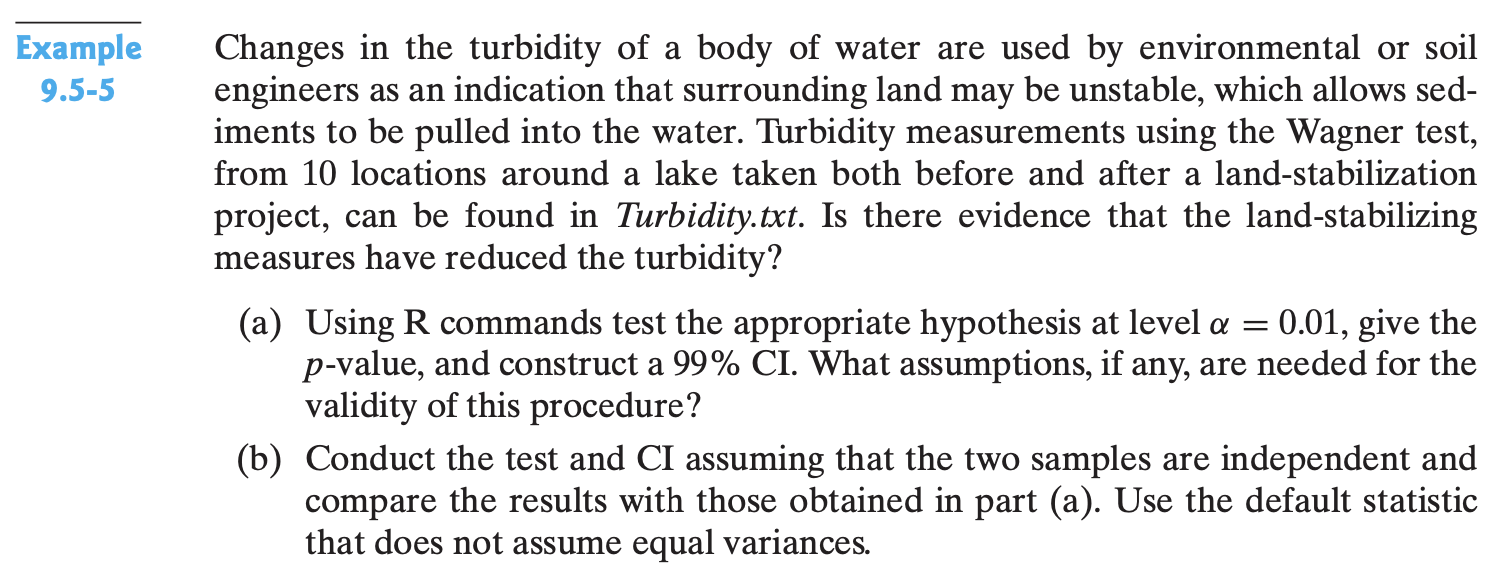

In [3]:
import pandas as pd

# Read the text file into a DataFrame
df = pd.read_csv("https://media.pearsoncmg.com/cmg/pmmg_mml_shared/mathstatsresources/Akritas/Turbidity.txt", delim_whitespace=True)  # Adjust delimiter if needed

# Display the first few rows
print(df.head())

# Extract before and after measurements
before = df['Before']
after = df['After']

<ipython-input-3-521ade5cc0ba>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("https://media.pearsoncmg.com/cmg/pmmg_mml_shared/mathstatsresources/Akritas/Turbidity.txt", delim_whitespace=True)  # Adjust delimiter if needed


   Before  After
0    19.6   18.6
1    21.2   19.6
2    24.8   22.0
3    20.0   19.1
4    18.8   17.4


In [4]:
df.describe()

,Before,After
count,10.000000,10.000000
mean,23.180000,21.470000
std,4.185106,3.804982
min,18.800000,17.400000
25%,20.225000,19.225000
50%,21.400000,19.750000
75%,24.725000,22.150000
max,30.900000,28.600000


In [5]:
# Perform one-sided paired t-test (before > after)
t_stat_paired, p_value_paired = stats.ttest_rel(before, after, alternative='greater')

# Compute 99% confidence interval
diff = before - after
ci_paired = stats.t.interval(0.99, len(diff)-1, loc=diff.mean(), scale=stats.sem(diff))

print(f"Paired t-test: T-statistic = {t_stat_paired:.4f}, p-value = {p_value_paired:.4f}")
print(f"99% CI for mean difference: {ci_paired}")

Paired t-test: T-statistic = 8.7606, p-value = 0.0000
99% CI for mean difference: (1.0756574088824205, 2.344342591117579)


In [6]:
# Perform one-sided Welch’s t-test (before > after, assuming unequal variances)
t_stat_ind, p_value_ind = stats.ttest_ind(before, after, equal_var=False, alternative='greater')

print(f"Independent t-test: T-statistic = {t_stat_ind:.4f}, p-value = {p_value_ind:.4f}")

Independent t-test: T-statistic = 0.9560, p-value = 0.1759


In [ ]:
import numpy as np
import scipy.stats as stats

# Compute sample means and variances
mean_before, mean_after = before.mean(), after.mean()
var_before, var_after = before.var(ddof=1), after.var(ddof=1)
n_before, n_after = len(before), len(after)

# Compute degrees of freedom (ν) using the Welch-Satterthwaite equation
numerator = (var_before/n_before + var_after/n_after) ** 2
denominator = ((var_before/n_before) ** 2) / (n_before - 1) + ((var_after/n_after) ** 2) / (n_after - 1)
df_welch = numerator / denominator

# Compute standard error
se = np.sqrt(var_before/n_before + var_after/n_after)

# Find critical t-value for 99% CI
t_critical = stats.t.ppf(0.995, df_welch)  # 0.995 for two-tailed (alpha = 0.01)

# Compute confidence interval
ci_lower = (mean_before - mean_after) - t_critical * se
ci_upper = (mean_before - mean_after) + t_critical * se

print(f"Welch-Satterthwaite t-test: T-statistic = {t_stat_ind:.4f}, p-value = {p_value_ind:.4f}")
print(f"99% CI for mean difference: ({ci_lower:.4f}, {ci_upper:.4f})")
print(f"Degrees of freedom (ν): {df_welch:.4f}")

Welch-Satterthwaite t-test: T-statistic = 0.9560, p-value = 0.1759
99% CI for mean difference: (-3.4439, 6.8639)
Degrees of freedom (ν): 17.8392


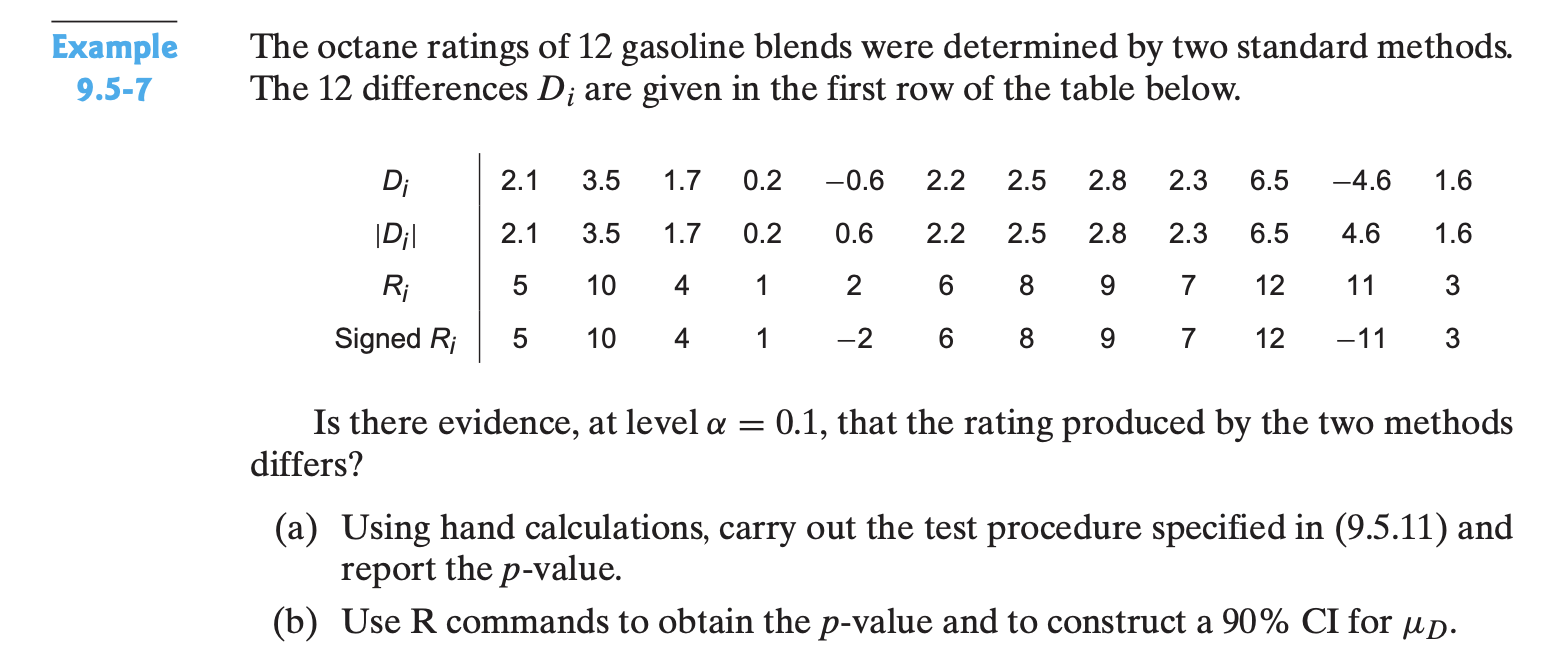

In [7]:
import numpy as np
from scipy.stats import wilcoxon, norm

# Given differences
d = np.array([2.1, 3.5, 1.6, 0.2, -0.6, 2.2, 2.5, 2.8, 2.3, 6.5, -4.6, 1.6])

# Perform Wilcoxon Signed-Rank Test
test_statistic, p_value = wilcoxon(d, alternative='two-sided')

# Compute 90% Confidence Interval manually
alpha = 0.1
n = len(d)
ranked_abs_d = np.abs(d)
ranked_abs_d.sort()
SE = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)  # Standard error for signed-rank test
Z = norm.ppf(1 - alpha / 2)  # Z-score for 90% CI
CI_lower = np.median(d) - Z * SE / np.sqrt(n)
CI_upper = np.median(d) + Z * SE / np.sqrt(n)

# Output results
print(f"Wilcoxon Signed-Rank Test Statistic: {test_statistic:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"90% Confidence Interval for mu_D: ({CI_lower:.2f}, {CI_upper:.2f})")

Wilcoxon Signed-Rank Test Statistic: 13.00
p-value: 0.0425
90% Confidence Interval for mu_D: (-3.90, 8.20)


In [8]:
import numpy as np
import scipy.stats as stats

def signed_rank_test(differences, alpha=0.1, alternative='two-sided'):
    n = len(differences)
    if n < 10:
        raise ValueError("Sample size must be at least 10 for this procedure.")

    # Step 2(a): Rank absolute differences
    abs_diff = np.abs(differences)
    ranks = stats.rankdata(abs_diff)

    # Step 2(b): Assign ranks the sign of differences
    signed_ranks = np.sign(differences) * ranks

    # Step 2(c): Compute S+
    S_plus = np.sum(signed_ranks[signed_ranks > 0])

    # Step 3: Compute test statistic Z_H0
    mean_S = n * (n + 1) / 4
    var_S = n * (n + 1) * (2 * n + 1) / 24
    Z_H0 = (S_plus - mean_S) / np.sqrt(var_S)

    # Step 4 & 5: Compute p-value based on alternative hypothesis
    if alternative == 'greater':
        p_value = 1 - stats.norm.cdf(Z_H0)
    elif alternative == 'less':
        p_value = stats.norm.cdf(Z_H0)
    else:  # two-sided
        p_value = 2 * (1 - stats.norm.cdf(abs(Z_H0)))

    return S_plus, Z_H0, p_value

# Example Data
differences = np.array([2.1, 3.5, 1.7, 0.2, -0.6, 2.2, 2.5, 2.8, 2.3, 6.5, -4.6, 1.6])
S_plus, Z_H0, p_value = signed_rank_test(differences, alpha=0.1)

print(f"S+: {S_plus}")
print(f"Z_H0: {Z_H0:.2f}")
print(f"p-value: {p_value:.3f}")


S+: 65.0
Z_H0: 2.04
p-value: 0.041


# PRACTICE PROBLEMS

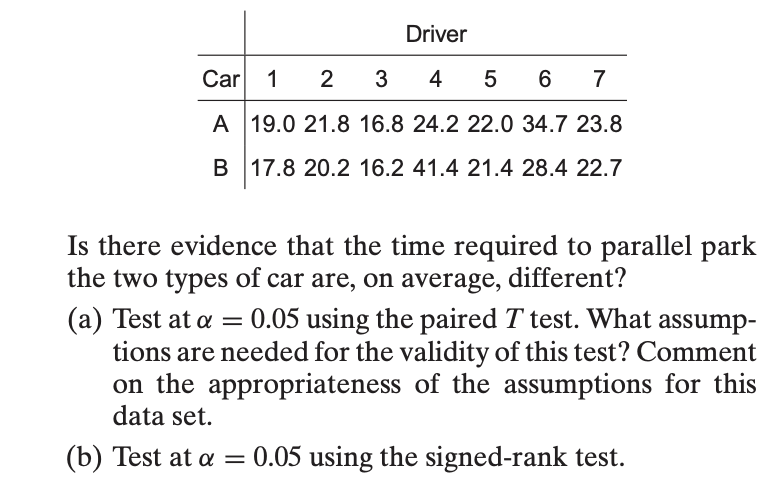

Paired t-test: t = -0.2927, p-value = 0.7796
Shapiro-Wilk test: W = 0.6711, p-value = 0.0018


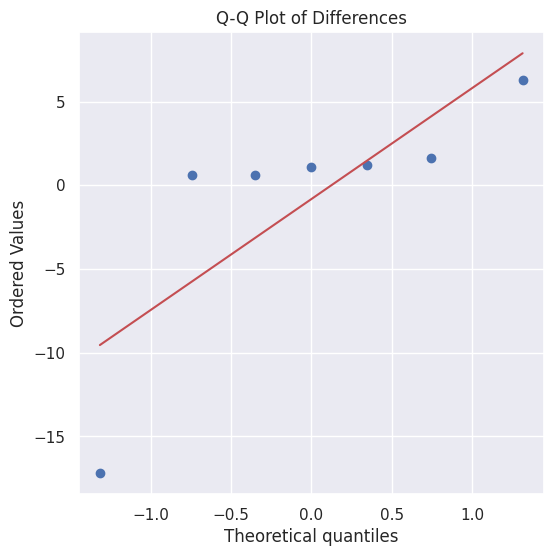

Wilcoxon signed-rank test: W = 7.0000, p-value = 0.2969


In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data
A = np.array([19.0, 21.8, 16.8, 24.2, 22.0, 34.7, 23.8])
B = np.array([17.8, 20.2, 16.2, 41.4, 21.4, 28.4, 22.7])
D = A - B  # Differences

# Paired t-test
t_stat, p_ttest = stats.ttest_rel(A, B)
print(f"Paired t-test: t = {t_stat:.4f}, p-value = {p_ttest:.4f}")

# Shapiro-Wilk test for normality of differences
shapiro_stat, p_shapiro = stats.shapiro(D)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p-value = {p_shapiro:.4f}")

# Q-Q plot for normality check
plt.figure(figsize=(6, 6))
stats.probplot(D, dist="norm", plot=plt)
plt.title("Q-Q Plot of Differences")
plt.show()

# Wilcoxon signed-rank test
wilcoxon_stat, p_wilcoxon = stats.wilcoxon(D)
print(f"Wilcoxon signed-rank test: W = {wilcoxon_stat:.4f}, p-value = {p_wilcoxon:.4f}")

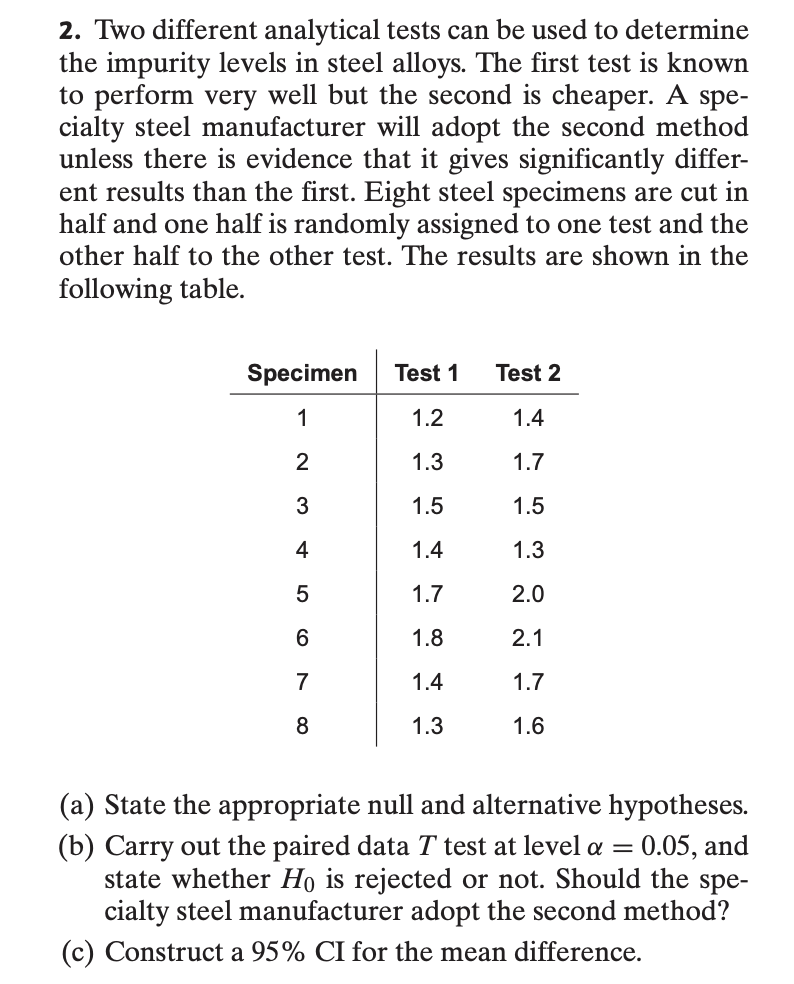

Paired t-test results: t = 3.4805, p = 0.0103
Reject H0: The second test gives significantly different results.
95% Confidence Interval for the mean difference: (0.0681, 0.3569)


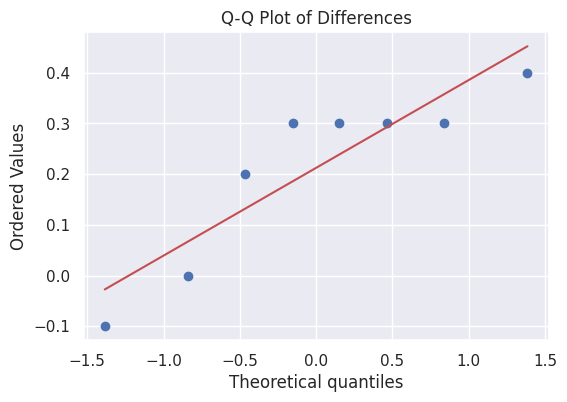

In [23]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Data
test_1 = np.array([1.2, 1.3, 1.5, 1.4, 1.7, 1.8, 1.4, 1.3])
test_2 = np.array([1.4, 1.7, 1.5, 1.3, 2.0, 2.1, 1.7, 1.6])

# Compute differences
diff = test_2 - test_1

# (a) Null and alternative hypotheses:
# H0: μ_d = 0  (No difference between tests)
# H1: μ_d ≠ 0  (Significant difference between tests)

# (b) Paired t-test
t_stat, p_value = stats.ttest_rel(test_2, test_1)
alpha = 0.05

print(f"Paired t-test results: t = {t_stat:.4f}, p = {p_value:.4f}")
if p_value < alpha:
    print("Reject H0: The second test gives significantly different results.")
else:
    print("Fail to reject H0: No significant difference between the two tests.")

# (c) 95% Confidence Interval for mean difference
mean_diff = np.mean(diff)
std_err = stats.sem(diff)  # Standard error
t_crit = stats.t.ppf(1 - alpha/2, len(diff) - 1)  # Critical t-value

ci_lower = mean_diff - t_crit * std_err
ci_upper = mean_diff + t_crit * std_err

print(f"95% Confidence Interval for the mean difference: ({ci_lower:.4f}, {ci_upper:.4f})")

# Q-Q plot for normality check
plt.figure(figsize=(6, 4))
stats.probplot(diff, dist="norm", plot=plt)
plt.title("Q-Q Plot of Differences")
plt.show()

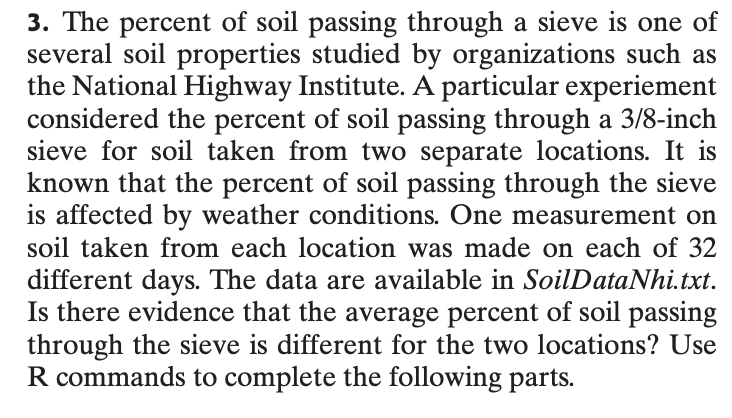

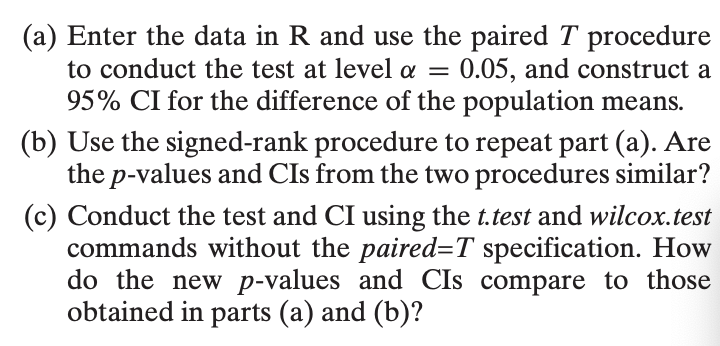

In [24]:
import pandas as pd

# Read the text file into a DataFrame
df = pd.read_csv("https://media.pearsoncmg.com/cmg/pmmg_mml_shared/mathstatsresources/Akritas/SoilDataNhi.txt", delim_whitespace=True)  # Adjust delimiter if needed

# Display the first few rows
print(df.head())

<ipython-input-24-0f64594266bf>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("https://media.pearsoncmg.com/cmg/pmmg_mml_shared/mathstatsresources/Akritas/SoilDataNhi.txt", delim_whitespace=True)  # Adjust delimiter if needed


   Day  Soil1  Soil2
1    1   31.9   44.4
2    2   25.3   28.2
3    3   26.7   32.4
4    4   33.1   46.5
5    5   43.2   49.1


In [25]:
df.describe()

,Day,Soil1,Soil2
count,32.000000,32.000000,32.000000
mean,16.781250,30.943750,33.781250
std,9.918163,7.988497,9.999208
min,1.000000,16.000000,18.500000
25%,8.750000,26.175000,25.700000
50%,16.500000,30.700000,32.000000
75%,24.250000,33.700000,43.500000
max,39.000000,57.300000,54.900000


In [26]:
# Extract soil measurements
soil1 = df["Soil1"]
soil2 = df["Soil2"]

# Compute differences
differences = soil1 - soil2

# Conduct paired t-test
t_stat, p_value = stats.ttest_rel(soil1, soil2)

# Compute 95% confidence interval
mean_diff = np.mean(differences)
std_err = stats.sem(differences)
confidence_interval = stats.t.interval(0.95, len(differences)-1, loc=mean_diff, scale=std_err)

# Print results
print("Paired T-Test Results:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
print(f"95% Confidence Interval: {confidence_interval}")

Paired T-Test Results:
T-statistic: -2.1820, P-value: 0.0368
95% Confidence Interval: (-5.489654164118829, -0.1853458358811726)


In [19]:
# Conduct Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(soil1, soil2)

# Print results
print("\nWilcoxon Signed-Rank Test Results:")
print(f"Statistic: {wilcoxon_stat:.4f}, P-value: {wilcoxon_p:.4f}")


Wilcoxon Signed-Rank Test Results:
Statistic: 141.0000, P-value: 0.0360


In [21]:
# Independent (unpaired) t-test
t_stat_unpaired, p_value_unpaired = stats.ttest_ind(soil1, soil2, equal_var=False)

# Wilcoxon rank-sum test (Mann-Whitney U test)
mann_whitney_stat, mann_whitney_p = stats.mannwhitneyu(soil1, soil2, alternative='two-sided')

# Print results
print("\nIndependent (Unpaired) T-Test Results:")
print(f"T-statistic: {t_stat_unpaired:.4f}, P-value: {p_value_unpaired:.4f}")

print("\nMann-Whitney U Test Results:")
print(f"Statistic: {mann_whitney_stat:.4f}, P-value: {mann_whitney_p:.4f}")


Independent (Unpaired) T-Test Results:
T-statistic: -1.2542, P-value: 0.2147

Mann-Whitney U Test Results:
Statistic: 440.5000, P-value: 0.3404


In [22]:
import numpy as np

# Compute means and standard errors
mean_diff_unpaired = np.mean(soil1) - np.mean(soil2)
se_diff_unpaired = np.sqrt(np.var(soil1, ddof=1)/len(soil1) + np.var(soil2, ddof=1)/len(soil2))

# Compute confidence interval
df_unpaired = len(soil1) + len(soil2) - 2  # Degrees of freedom
t_critical = stats.t.ppf(0.975, df_unpaired)  # Two-tailed t-critical value

ci_unpaired = (mean_diff_unpaired - t_critical * se_diff_unpaired,
               mean_diff_unpaired + t_critical * se_diff_unpaired)

print("\nIndependent (Unpaired) T-Test Confidence Interval:")
print(f"95% CI: {ci_unpaired}")


Independent (Unpaired) T-Test Confidence Interval:
95% CI: (-7.360107371483366, 1.6851073714833689)
